In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [32]:
from sklearn import metrics
from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [9]:
calories = pd.read_csv("/content/calories.csv")
exercise = pd.read_csv("/content/exercise.csv")

In [10]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [11]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [12]:
exercise_df = exercise.merge(calories , on = "User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
print("This dataset has " , exercise_df.shape[0] ," instances and ",  exercise_df.shape[1] , " columns.")

This dataset has  15000  instances and  9  columns.


In [14]:
print("Columns : ")
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  print("\t" , i + 1 , "." ,  column)

Columns : 
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


In [15]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


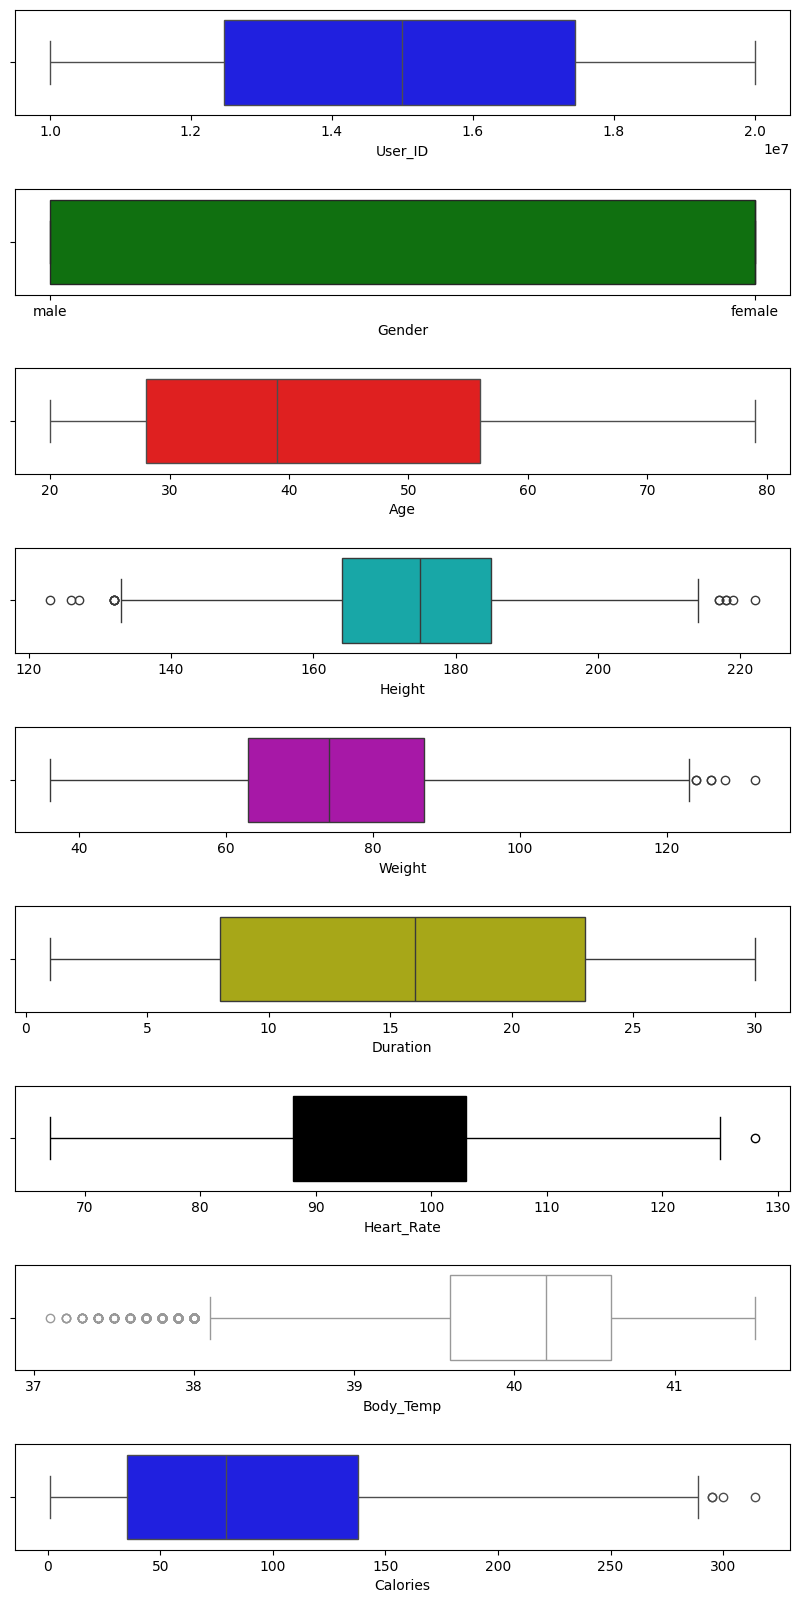

In [16]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_df.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  try:
    sns.boxplot(data = exercise_df , x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

<Axes: >

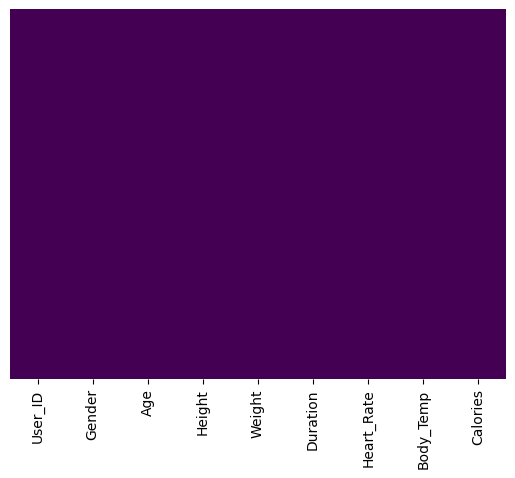

In [17]:
sns.heatmap(exercise_df.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

In [18]:
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)    # Keeping the first example of duplicates in 'User_ID' column.
print("The shape of dataset after dropping duplicates : " , exercise_df.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


In [55]:
fig = px.box(exercise_df , x= "Gender" , y = "Heart_Rate")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

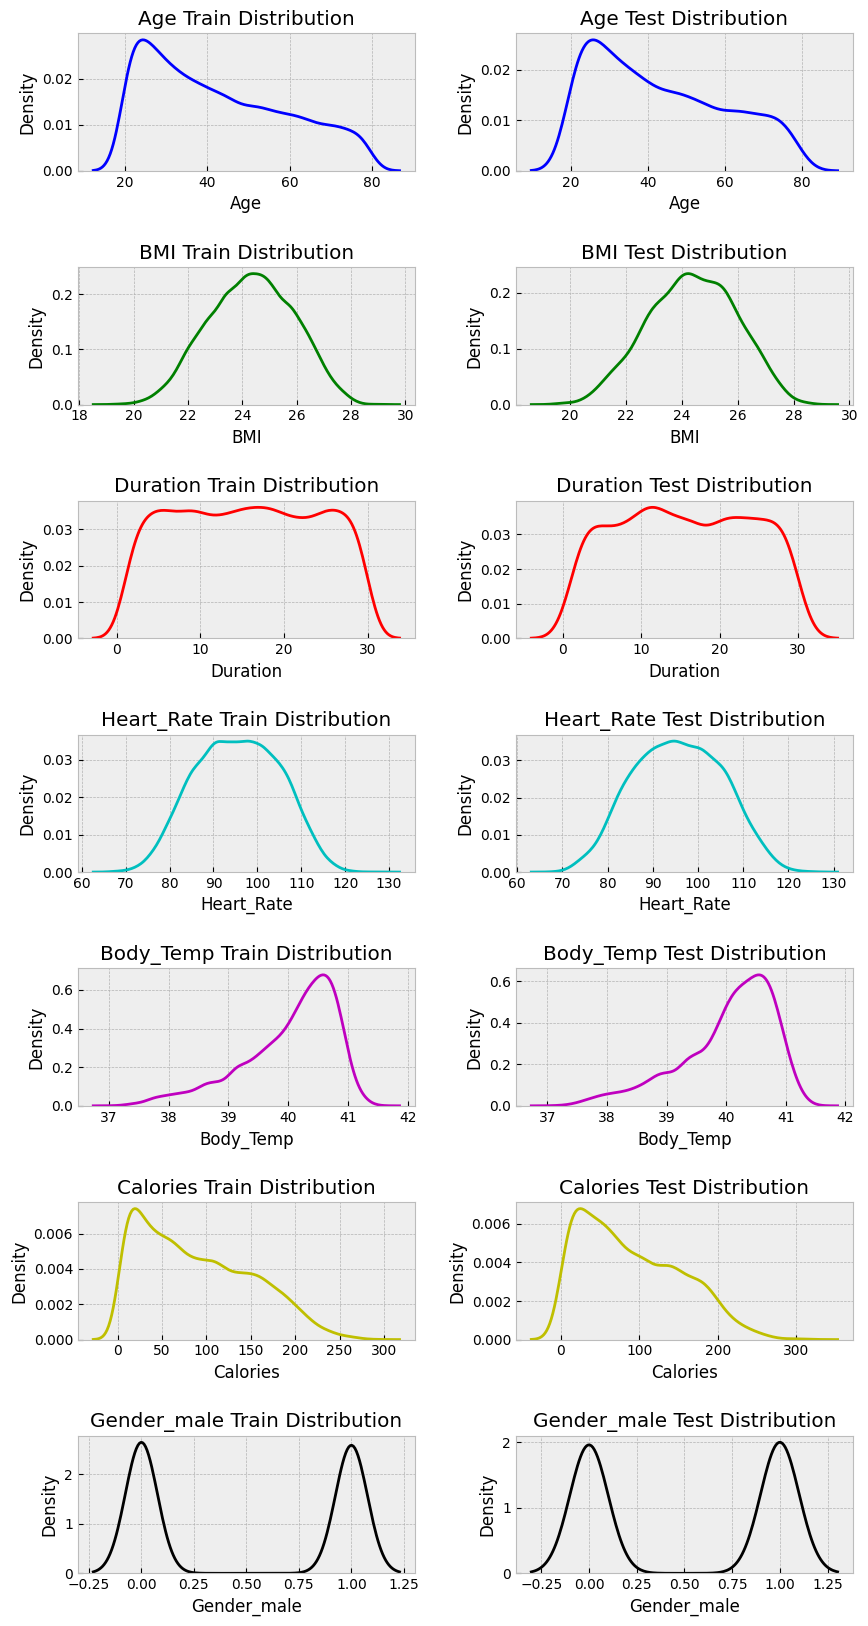

In [19]:
from matplotlib import style
style.use("bmh")

c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_train_data.columns) , 2 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension

for i , column , color in zip(range(0 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Train Distribution")
    sns.kdeplot(data = exercise_train_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

for i , column , color in zip(range(1 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Test Distribution")
    sns.kdeplot(data = exercise_test_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

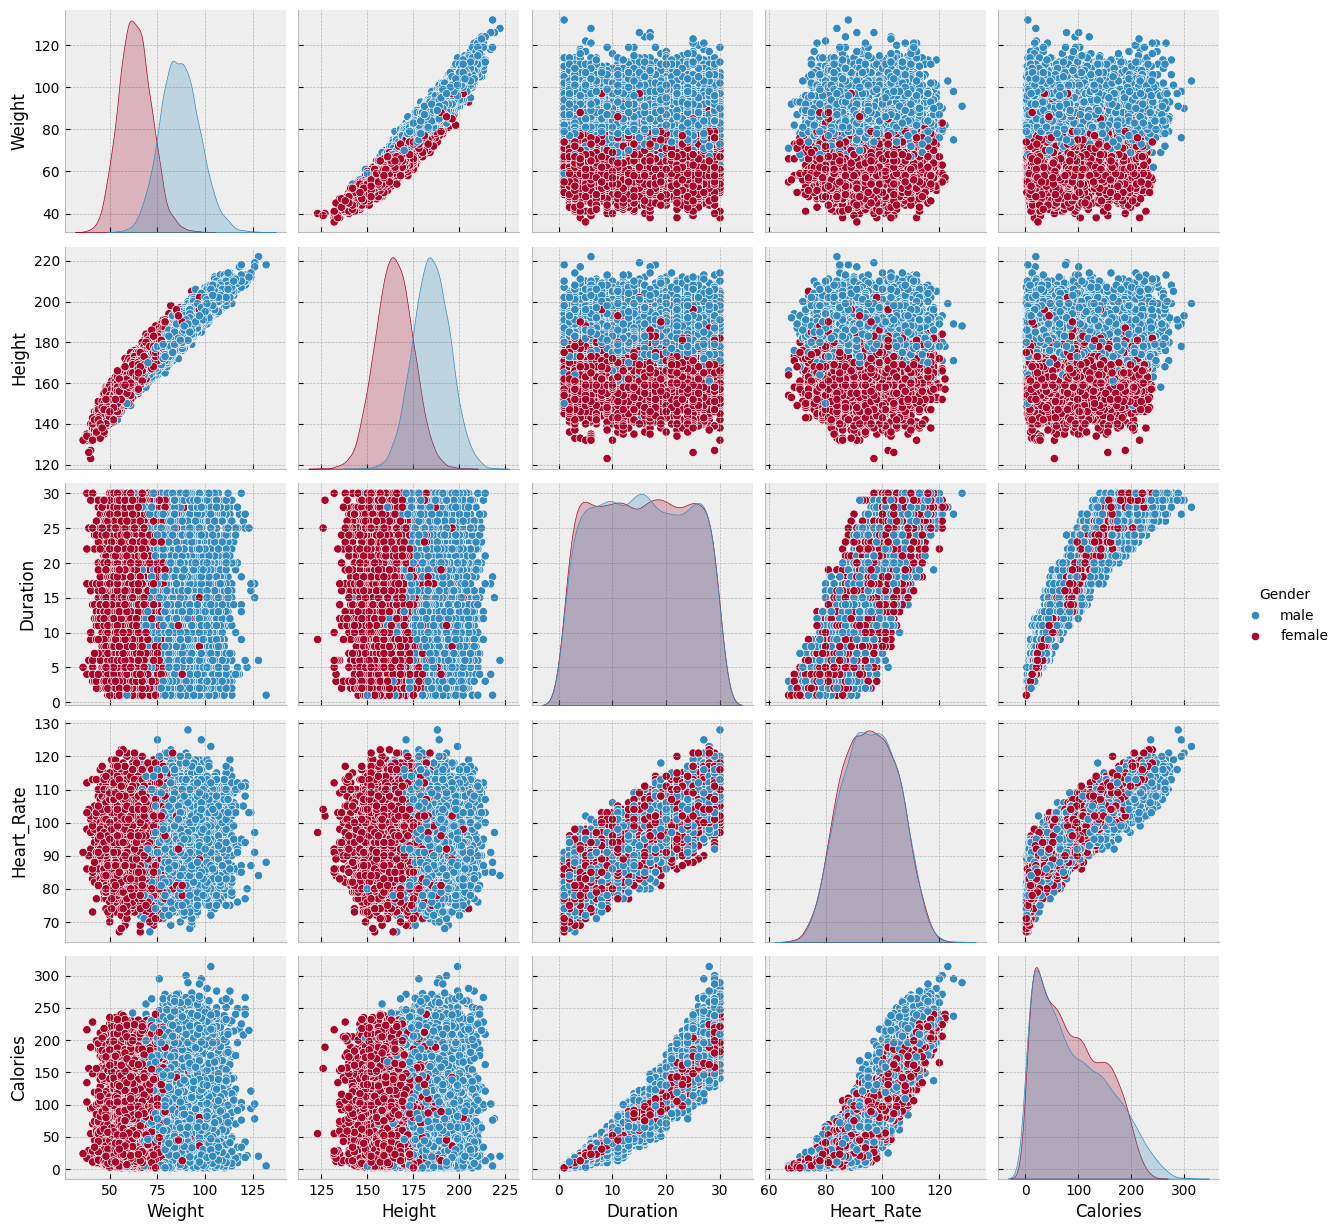

In [34]:
sns.pairplot(exercise_df[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

In [39]:
exercise_train_data.columns


Index(['Age', 'BMI', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories',
       'Gender_male'],
      dtype='object')

In [42]:
for data in [exercise_df , exercise_df]:         # adding BMI column to both training and test sets
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)

In [46]:
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

exercise_df["Categorized_BMI"] = pd.cut(exercise_df["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)

In [47]:
ds = exercise_df["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

,Categorized_BMI,Count
0,Normal,9741
1,Overweight,5259
2,Severely underweight,0
3,Very severely underweight,0
4,Underweight,0
5,Obese Class I,0
6,Obese Class II,0
7,Obese Class III,0


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

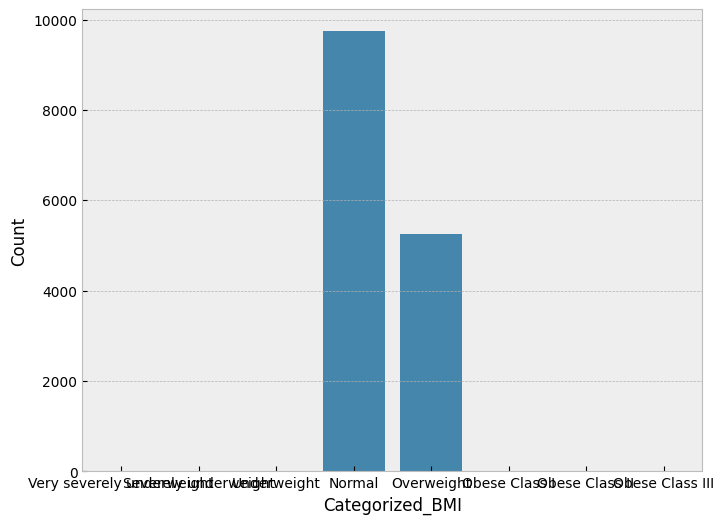

In [48]:
ds = ds[(ds["Categorized_BMI"] == "Normal") | (ds["Categorized_BMI"] == "Overweight")]
#ds["Categorized_BMI"] = ds["Categorized_BMI"].astype("object")

plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count")

<Axes: >

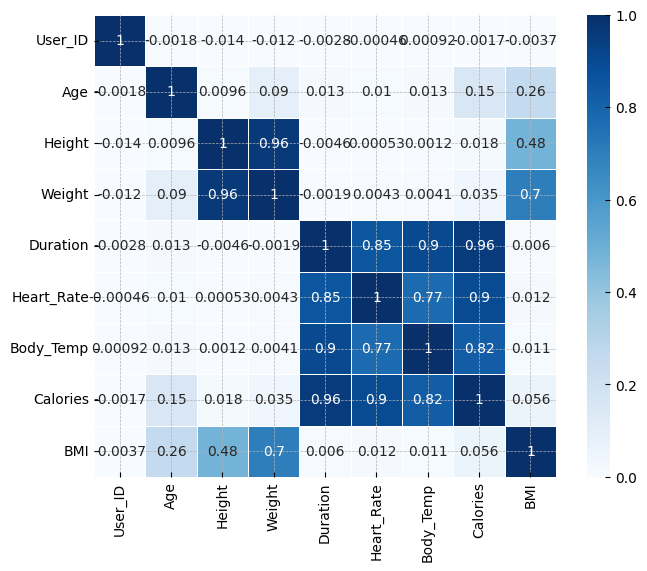

In [50]:
plt.rcParams["figure.figsize"] = 8 , 6
corr = exercise_df.corr(numeric_only = True)
sns.heatmap(corr , annot = True , square = True , linewidth = .5 , vmin = 0 , vmax = 1 , cmap = 'Blues')

In [37]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

In [38]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  5.35
RandomForest Mean Squared Error(MSE) :  69.66
RandomForest Root Mean Squared Error(RMSE) :  8.35


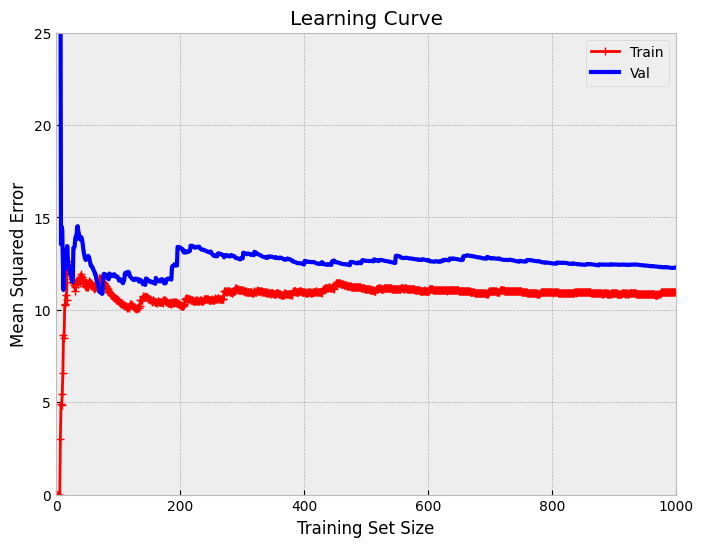

In [35]:
train_errors , val_errors = [] , []
def plot_learning_curve(model):
  for m in range(1 , 1000):
    model.fit(X_train[:m] , y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_test[:m])
    train_errors.append(mean_squared_error(y_train[:m] , y_train_predict))
    val_errors.append(mean_squared_error(y_test[:m] , y_val_predict))

  plt.plot(np.sqrt(train_errors) , "r-+" , linewidth = 2 , label = "Train")
  plt.plot(np.sqrt(val_errors) , "b-" , linewidth = 3 , label = "Val")
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size")
  plt.ylabel("Mean Squared Error")
  plt.xlim([0 , 1000])
  plt.ylim([0 , 25])
  plt.legend()
linreg = LinearRegression()
plot_learning_curve(linreg)

In [51]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  5.35
RandomForest Mean Squared Error(MSE) :  69.66
RandomForest Root Mean Squared Error(RMSE) :  8.35


In [52]:
exercise_train_data.iloc[32]

,5897
Age,23
BMI,24.88
Duration,27.0
Heart_Rate,102.0
Body_Temp,40.3
Calories,140.0
Gender_male,True


In [53]:
X_array = np.array([[24 , 25 , 28 , 100 , 40 , 1]]).reshape(1 , -1)
y_pred = random_reg.predict(X_array)
print("Prediction : " , round(y_pred[0] , 2))

Prediction :  146.53
